In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#matplotilb inline

In [3]:
data=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/data_finally.csv')
test_data=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/fillna_test.csv')
train=data.iloc[:(len(data)-len(test_data)),:]
test=data.iloc[(len(data)-len(test_data)):,:]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25724 entries, 0 to 25723
Data columns (total 15 columns):
air_in          25724 non-null float64
air_out         25724 non-null float64
air_subtract    25724 non-null float64
day             25724 non-null int64
hour            25724 non-null int64
hum_in          25724 non-null float64
hum_out         25724 non-null float64
hum_subtract    25724 non-null float64
min             25724 non-null int64
month           25724 non-null int64
s               25724 non-null int64
tem_out         25724 non-null float64
temperature     25318 non-null float64
time            25724 non-null int64
year            25724 non-null int64
dtypes: float64(8), int64(7)
memory usage: 2.9 MB


In [5]:
month_bin_dummies_df = pd.get_dummies(data['month']).rename(columns=lambda x: 'month_' + str(x))
data = pd.concat([data, month_bin_dummies_df], axis=1)

hour_bin_dummies_df = pd.get_dummies(data['hour']).rename(columns=lambda x: 'hour_' + str(x))
data = pd.concat([data, hour_bin_dummies_df], axis=1)

min_bin_dummies_df = pd.get_dummies(data['min']).rename(columns=lambda x: 'min_' + str(x))
data = pd.concat([data, min_bin_dummies_df], axis=1)

In [6]:
data.drop(['time','year','month','hour','min','s'],inplace=True,axis=1)

In [15]:
train=data.iloc[:(len(data)-len(test_data)),:].reset_index(drop=True)
test=data.iloc[(len(data)-len(test_data)):,:].reset_index(drop=True)

In [9]:
#时间序列问题的交叉验证
from sklearn.model_selection import  TimeSeriesSplit
tscv=TimeSeriesSplit(n_splits=5)
print(tscv)
for train_,test_ in tscv.split(train):
    print("%s %s"%(train_,test_))

TimeSeriesSplit(max_train_size=None, n_splits=5)
[   0    1    2 ... 4220 4221 4222] [4223 4224 4225 ... 8439 8440 8441]
[   0    1    2 ... 8439 8440 8441] [ 8442  8443  8444 ... 12658 12659 12660]
[    0     1     2 ... 12658 12659 12660] [12661 12662 12663 ... 16877 16878 16879]
[    0     1     2 ... 16877 16878 16879] [16880 16881 16882 ... 21096 21097 21098]
[    0     1     2 ... 21096 21097 21098] [21099 21100 21101 ... 25315 25316 25317]


C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\ZC7\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

train_score: [0.9995384715096436, 0.9998077296956159, 0.9998652553350287, 0.9998378731510235, 0.9998563439626733]
test_score: [0.5587822735072389, 0.9697926423315526, 0.9422156930852563, 0.899797034662996, 0.7148889470003313]
train_score.mean: 0.999781134730797
test_score.mean: 0.817095318117475


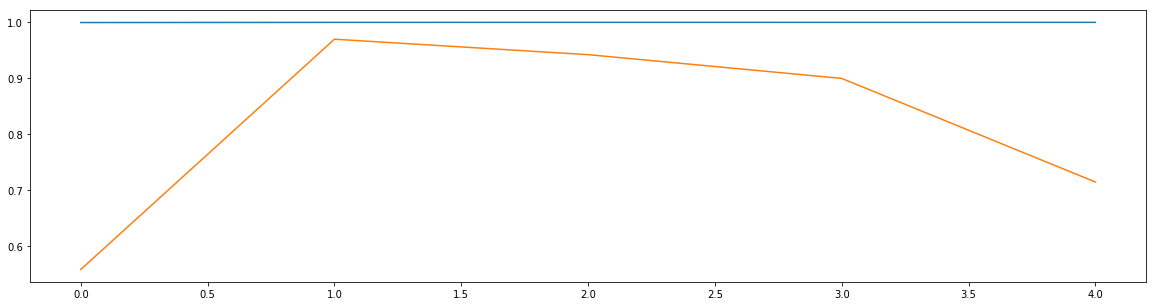

In [62]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
X=train.drop(['temperature'],axis=1)
y=train[['temperature']]
tscv = TimeSeriesSplit(n_splits=5)
score_rf_train_list=[]
score_rf_test_list=[]
for train_index, test_index in tscv.split(X):
#     print("train_index:",train_index)
#     print("test_index:",test_index)
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]
    rf=RandomForestRegressor(random_state=42)
    rf=rf.fit(X_train,y_train)
    score_rf_train=rf.score(X_train,y_train)
    score_rf_test=rf.score(X_test,y_test)
    score_rf_train_list.append(score_rf_train)
    score_rf_test_list.append(score_rf_test)
print("train_score:",score_rf_train_list)
print("test_score:",score_rf_test_list)
print("train_score.mean:",np.mean(score_rf_train_list))
print("test_score.mean:",np.mean(score_rf_test_list))
plt.figure(figsize=[20,5])
plt.plot(np.arange(0,5),score_rf_train_list)
plt.plot(np.arange(0,5),score_rf_test_list)
plt.show()

In [3]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]])
y = np.array([3, 5, 7, 9, 11, 13])
tscv = TimeSeriesSplit(max_train_size=5,n_splits=5)
print(tscv)

for train_index, test_index in tscv.split(X):
    print(train_index)
    print(test_index)

TimeSeriesSplit(max_train_size=5, n_splits=5)
[0]
[1]
[0 1]
[2]
[0 1 2]
[3]
[0 1 2 3]
[4]
[0 1 2 3 4]
[5]


In [73]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
Xtrain,Xtest,Ytrain,Ytest=train_test_split(train.drop(['temperature'],axis=1),train['temperature'],test_size=0.3)

In [70]:
rf=RandomForestRegressor(random_state=42,n_estimators=40,max_depth=7,min_impurity_split=5,min_samples_leaf=6)
rf=rf.fit(Xtrain,Ytrain)
score_R = rf.score(Xtest,Ytest)
score_R

0.7526204207876318

In [69]:
import time
from sklearn.model_selection import  cross_val_score  #交叉验证
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV #网格搜索
bengin=time.time()
param_dist = {
        'n_estimators':range(40,50,1)
        ,'max_depth':np.arange(1,8,1)
        ,'min_samples_leaf':np.arange(2,8,1)
        ,'min_samples_split':np.arange(2,8,1)
       #,'criterion':['gini', 'entropy']
        }
rand=RandomizedSearchCV(rf,param_dist,cv=10,n_jobs=3)
rand.fit(train.drop(['temperature'],axis=1),train['temperature'])
print(rand.best_params_)
print(rand.best_score_)
end=time.time()
times=end-bengin
print(times)


{'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 7}
0.8557512258461812
108.60490560531616


-2.180666251537345 2


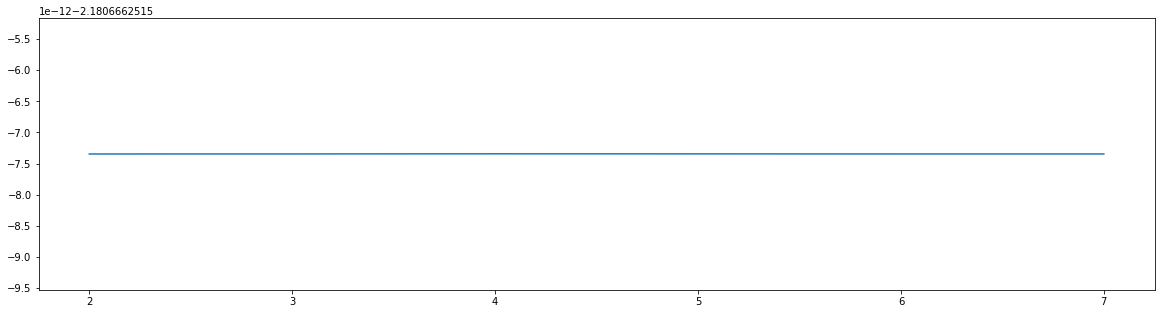

In [67]:
from sklearn.model_selection import cross_val_score
superpa = []
for i in np.arange(2,8):
    rfc = RandomForestRegressor(n_estimators=46,max_depth=1,n_jobs=-1,random_state=42,min_samples_leaf=i)
    rfc_s = cross_val_score(rfc,train.drop(['temperature'],axis=1),train['temperature'],cv=10).mean()
    superpa.append(rfc_s)
print(min(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(np.arange(2,8),superpa)
plt.show()

In [74]:
from
from sklearn.model_selection import GridSearchCV
# setup regressor
xgb_model = xgb.XGBRegressor() 
# # performance a grid search
# tweaked_model = GridSearchCV(
#     xgb_model,   
#     {
#         'max_depth':[1,2,5,10,20],
#         'n_estimators':[20,30,50,70,100],
#         'learning_rate':[0.1,0.2,0.3,0.4,0.5]
#     },   
#     cv = 3,   
#     verbose = 1,
#     n_jobs = -1,  
#     scoring = 'mean_squared_error')
# tweaked_model.fit(train.drop(['temperature'],axis=1),train['temperature'])
# print('Best: %f using %s'%(tweaked_model.best_score_, tweaked_model.best_params_))
xgb_model.fit(Xtrain,Ytrain)
score_xgb=xgb_model.score(Xtest,Ytest)
score_xgb

AttributeError: function 'XGBoosterSerializeToBuffer' not found

In [73]:
test_=pd.read_csv(r'C:/Users/ZC7/Desktop/tianchi/iFLYTEK_AI/test.csv')
test_['temperature']=result
test_[['time','temperature']].to_csv(r"C:/Users/ZC7/Desktop/tianchi/datacastle_rent/6_28_3.csv",index=False)

In [75]:
test_[['time','temperature']].to_csv(r"C:/Users/ZC7/Desktop/tianchi/datacastle_rent/6_28_3.csv",index=False)